### Residual Analysis

Residuals are the differences between the actual values(what we are trying to predict) and the predicted values from our model.In our case,its Actual Price-Predicted Price.

Key Assumptions:

1.Linearity:relationship between features.

2.Constant Variance:Residuals have similar spread across predicted values

3.Normality:Residuals are bell-shaped

4.Independence:Residuals dont follow pattern over time

Step-by-Step Process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target

In [5]:
x=df.drop('Price',axis=1)
y=df['Price']


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [8]:
r2_score=r2_score(y_test,y_pred)
print(f"R-squared:{r2_score}")

R-squared:0.5757877060324508


In [9]:
residuals=y_test-y_pred
print('First 5 Residual:')
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residual:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


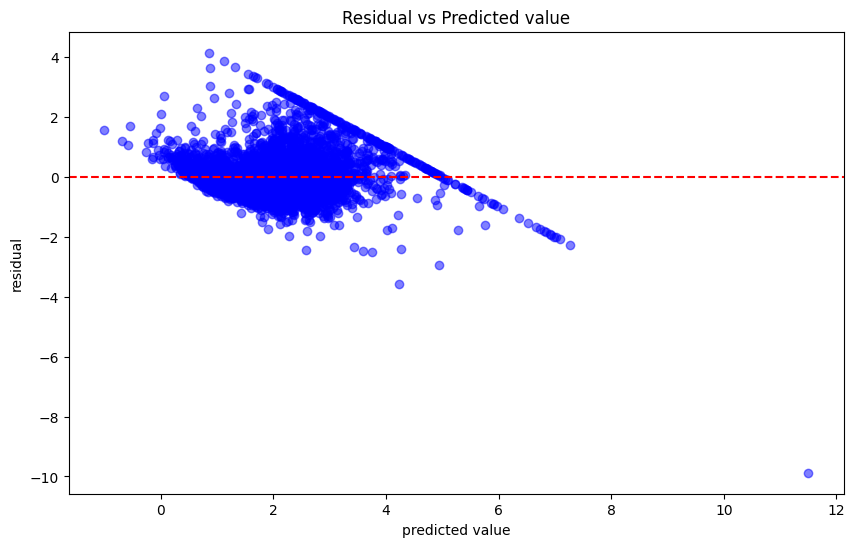

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')#Zero line
plt.title('Residual vs Predicted value')
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.show()


Text(0, 0.5, 'Frequency')

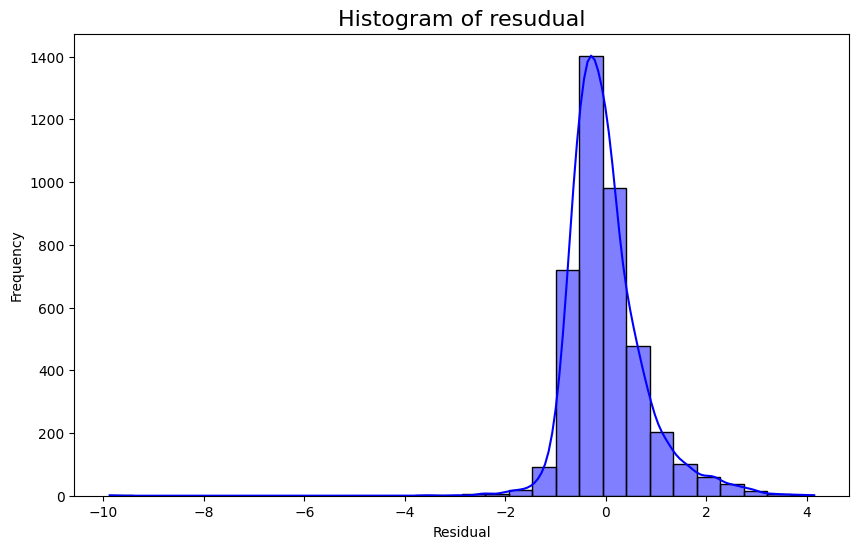

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of resudual',fontsize=16)
plt.xlabel('Residual')
plt.ylabel('Frequency')

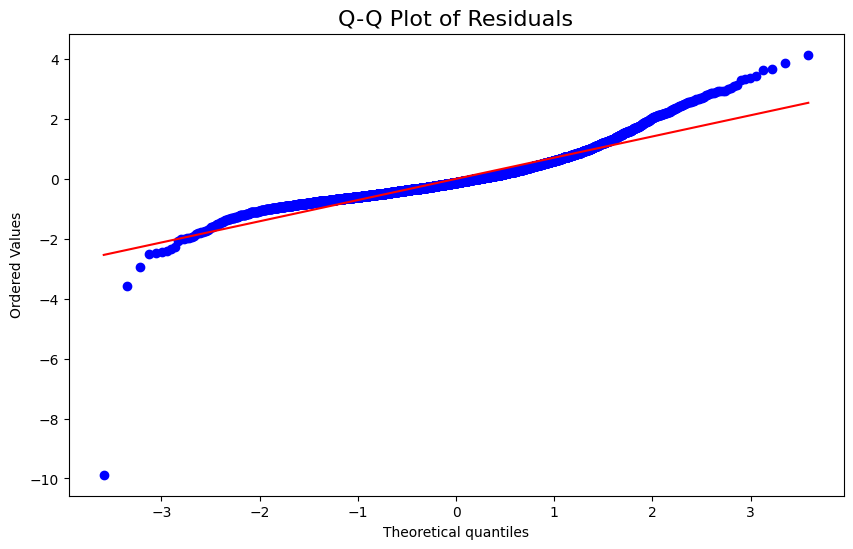

In [12]:

import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize=16)
plt.show()

By observing above graphs what we understand is:

1.Linearity

2.Constant Variance

3.Normality

4.Takeaway